In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

# **Importing the libraries**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import datetime as dt
#pd.set_option('max_column')

# **Importing the data**

In [22]:
df = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

In [23]:
df.shape

(940, 15)

In [24]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [25]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [26]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

# **Cleaning the data**

In [30]:
df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format = '%m/%d/%Y')
df.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
Distance_diff                      float64
dtype: object

In [35]:
df['Distance_diff'] = df['TotalDistance'] - df['TrackerDistance']

In [36]:
df['Distance_diff'].value_counts()

Distance_diff
0.000000    925
1.830000      1
0.190001      1
0.040000      1
0.810000      1
1.049999      1
0.760000      1
1.070000      1
0.980000      1
0.900001      1
1.140000      1
1.160000      1
0.880000      1
0.460000      1
1.160000      1
1.060000      1
Name: count, dtype: int64

In [37]:
df.query('Distance_diff > 0.00')

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Distance_diff
689,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179,1.830000
693,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194,0.190001
707,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105,0.040000
711,7007744171,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937,0.810000
712,7007744171,2016-04-13,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742,1.049999
713,7007744171,2016-04-14,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668,0.760000
717,7007744171,2016-04-18,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832,1.070000
718,7007744171,2016-04-19,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812,0.980000
719,7007744171,2016-04-20,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096,0.900001
724,7007744171,2016-04-25,18229,13.34,12.20,4.861792,4.31,1.37,7.67,0.00,51,24,379,986,3055,1.140000


In [38]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'activitydate', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories',
       'distance_diff'],
      dtype='object')

In [39]:
df.rename(columns = {'activitydate':'activity_date', 'totalsteps':'total_steps', 'totaldistance':'total_distance', 'trackerdistance':'tracker_distance',
       'loggedactivitiesdistance':'logged_activities_distance', 'veryactivedistance':'very_active_distance', 'moderatelyactivedistance':'moderately_active_distance', 'lightactivedistance':'light_active_distance',
       'sedentaryactivedistance':'sedentary_active_distance', 'veryactiveminutes':'very_active_minutes', 'fairlyactiveminutes':'fairly_active_minutes',
       'lightlyactiveminutes':'lightly_active_minutes', 'sedentaryminutes':'sedentary_minutes'}, inplace=True)
df.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'distance_diff'],
      dtype='object')

In [40]:
# Creating Columns
day_of_week = df['activity_date'].dt.day_name()
df['day_of_week'] = day_of_week

df['n_day_of_week'] = df['activity_date'].dt.weekday 

In [41]:
df.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'distance_diff', 'day_of_week', 'n_day_of_week'],
      dtype='object')

In [42]:
#Checking null values
df.isna().sum()

id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
distance_diff                 0
day_of_week                   0
n_day_of_week                 0
dtype: int64

In [17]:
df.isnull().sum()

id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
distance_diff                 0
day_of_week                   0
n_day_of_week                 0
dtype: int64

In [43]:
# Checking duplicates
df.duplicated().sum()

0

In [44]:
# Subset the data
df = df[['id', 'activity_date', 'total_steps', 'total_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'activity_level', 'day_of_week', 'n_day_of_week']].copy()

KeyError: "['activity_level'] not in index"

In [45]:
df.head(3)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff,day_of_week,n_day_of_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0.0,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,0.0,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,0.0,Thursday,3


# **Analyzing the data**

In [46]:
# Category 1
# sedantary: Less than 6000 steps on average
# active: Between 6000 steps and 12000 steps on average
# very active: More than 12000 steps on average

id_grp = df.groupby(['id'])
id_avg_step = id_grp['total_steps'].mean().sort_values(ascending=False)
id_avg_step = id_avg_step.to_frame()

conditions = [
    (id_avg_step <= 6000), 
    (id_avg_step > 6000) & (id_avg_step < 12000), 
    (id_avg_step >= 12000)
]
values = ['sedentary', 'active', 'very_active']

id_avg_step['activity_level'] = np.select(conditions,values)

id_activity_level = id_avg_step['activity_level']

df['activity_level'] = [id_activity_level[c] for c in df['id']]
df.head(10)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff,day_of_week,n_day_of_week,activity_level
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0.0,Tuesday,1,very_active
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,0.0,Wednesday,2,very_active
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,0.0,Thursday,3,very_active
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,0.0,Friday,4,very_active
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,0.0,Saturday,5,very_active
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,0.0,Sunday,6,very_active
6,1503960366,2016-04-18,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921,0.0,Monday,0,very_active
7,1503960366,2016-04-19,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035,0.0,Tuesday,1,very_active
8,1503960366,2016-04-20,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786,0.0,Wednesday,2,very_active
9,1503960366,2016-04-21,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775,0.0,Thursday,3,very_active


In [47]:
df['id'].value_counts()

id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64

In [48]:
df.describe()

,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff,n_day_of_week
count,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,0.014351,2.918085
min,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,0.000000,1.000000
50%,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,0.000000,3.000000
75%,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,0.000000,5.000000
max,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1.830000,6.000000
std,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,0.124458,1.942379


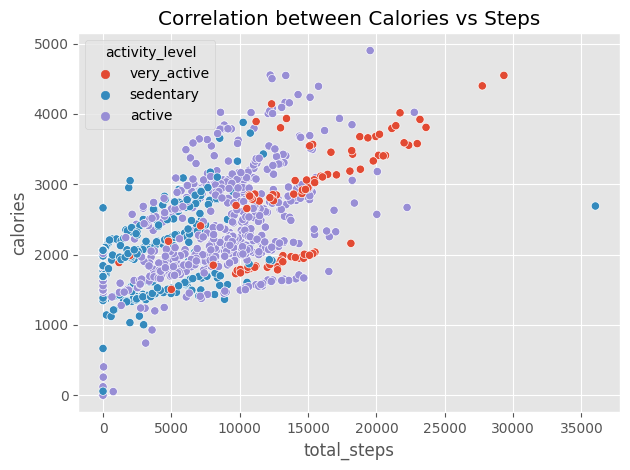

In [49]:
# Correlation between steps and calories burned

ax = sns.scatterplot(x='total_steps', y='calories', data=df, hue=df['activity_level'])

plt.title('Correlation between Calories vs Steps')

plt.tight_layout()
plt.show()

In [51]:
# Category 2
# Low use: Less than 8 hours per day on average
# Normal use: Between 8 and 16 hours per day on average
# High use: More than 16 hours and upto 24 hours per day on average

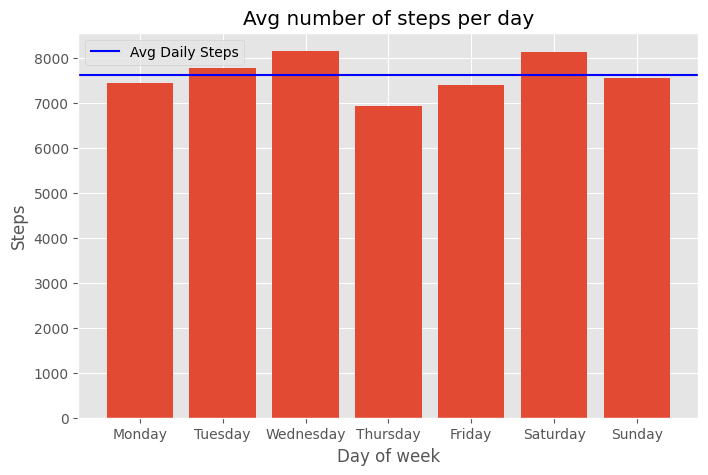

In [52]:
# Average Steps Per Day

day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
fig, ax = plt.subplots(1,1,figsize=(8,5))

day_grp = df.groupby(['day_of_week'])
avg_daily_steps = day_grp['total_steps'].mean()
avg_steps = df['total_steps'].mean()

plt.bar(avg_daily_steps.index, avg_daily_steps)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(y=avg_daily_steps.mean(), color='blue', label='Avg Daily Steps')
ax.set_ylabel('Steps')
ax.set_xlabel('Day of week')
ax.set_title('Avg number of steps per day')
plt.legend()
plt.show()

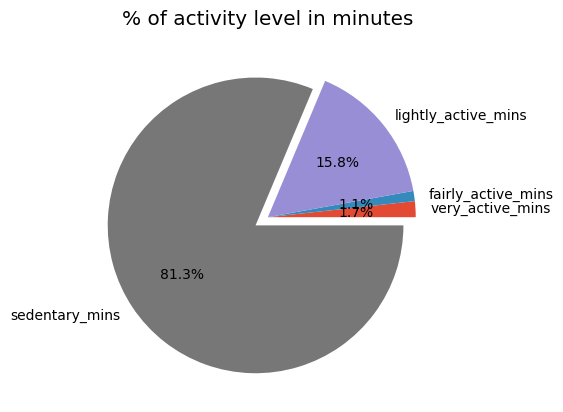

In [53]:
# Percentage of activity in minutes

very_active_mins = df['very_active_minutes'].sum()
fairly_active_mins = df['fairly_active_minutes'].sum()
lightly_active_mins = df['lightly_active_minutes'].sum()
sedentary_mins = df['sedentary_minutes'].sum()

slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]

labels = ['very_active_mins', 'fairly_active_mins', 'lightly_active_mins', 'sedentary_mins']

explode = [0,0,0,0.1]

plt.pie(slices, labels=labels, explode=explode, autopct = '%1.1f%%')

plt.title('% of activity level in minutes')
plt.show()

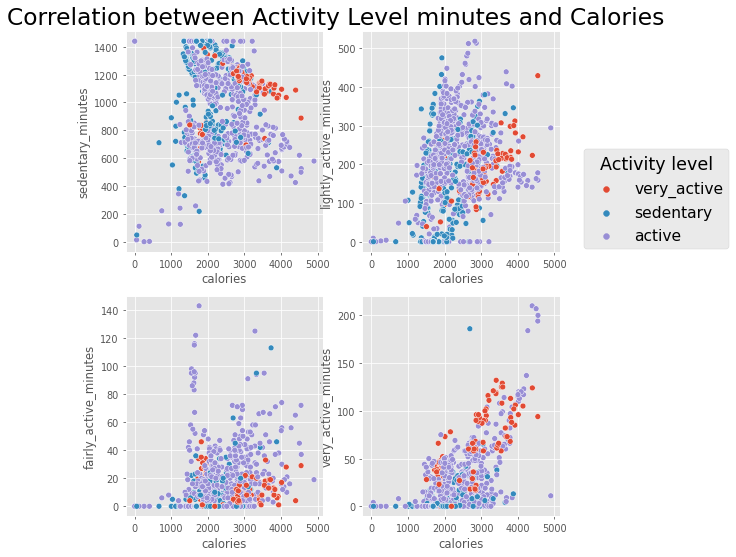

In [54]:
# Correaltion between activity level in minutes and calories

n_day_of_week = [0,1,2,3,4,5,6]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,9), dpi=70)
sns.scatterplot(data=df, x='calories', y='sedentary_minutes', hue='activity_level', ax=axes[0,0], legend=False)

sns.scatterplot(data=df, x='calories', y='lightly_active_minutes', hue='activity_level', ax=axes[0,1], legend=False)

sns.scatterplot(data=df, x='calories', y='fairly_active_minutes', hue='activity_level', ax=axes[1,0], legend=False)

sns.scatterplot(data=df, x='calories', y='very_active_minutes', hue='activity_level', ax=axes[1,1], legend=True)

plt.legend(title = 'Activity level', fontsize=16,title_fontsize=18, bbox_to_anchor = (1.9, 1.7))

fig.suptitle('Correlation between Activity Level minutes and Calories', x=0.5, y=0.92, fontsize=24)
plt.show()

